<a href="https://colab.research.google.com/github/Carumo/TrabajoFinal_MLDL/blob/main/Trabajo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Trabajo_final - Boston Vivienda</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Problema</a>  
3. <a href="#item33">Importar Librerías</a>  
4. <a href="#item34">Levantamiento y Análisis de Data</a>
5. <a href="#item34">Muestreo Train/Test</a>  
6. <a href="#item34">Modelamiento</a>

</font>
</div>

## 1. Introducción


Este notebook ha sido preparado como trabajo final de la Especialización de Machine Learning dictado en DMC.

## 2. Problema


Se busca ser el mejor agente inmobiliario que existe en la ciudad de Boston y para competir con otros agentes de la zona, decides utilizar el aprendizaje automático. A través de varias herramientas de análisis estadístico se tendrá que construir el mejor modelo que ayude a predecir el valor de una casa determinada. Con ello, el objetivo es encontrar el mejor precio al que el cliente pueda vender su casa.

## 3. Importar Librerías

In [131]:
# Scikit-Learn
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

# Imports comunes
import pandas as pd
import numpy as np


# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Cargar seaborn
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(8,5)})

# Cargar librerías de estadística
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import scipy
from scipy import stats
from scipy.stats import mstats, kruskal
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense

## 4. Levantamiento y Análisis de Data

In [132]:
# Cargar Data
data = pd.read_csv("bostonvivienda.csv")
data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,afro,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [133]:
data.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,afro,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000



<b>Descripción de datos</b>

La data de BostonVivienda tiene 506 filas, 12 variables independientes (numéricas / categóricas) y el target definida por la variable MEDV.

<b>Las variables predictoras o independientes son:</b>

---

* <b>crim : </b>  Tasa de criminalidad per cápita por ciudad.
* <b>zn : </b>  Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados.
* <b>indus : </b>  Proporción de acres de negocios empresariales por ciudad.
* <b>nox : </b>  Concentración de óxidos nítricos (partes por 10 millones).
* <b>rm : </b>  Promedio de habitaciones por vivienda.

* <b>age : </b>  Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>  distancias ponderadas a cinco centros de empleo de Boston.
* <b>rad : </b>  Índice de accesibilidad a autopistas radiales.
* <b>tax : </b>  Tasa de impuesto a la propiedad de valor total por 10,000 USD.
* <b>ptratio : </b>  Ratio de alumnos por profesor por ciudad.
* <b>afro : </b>  1000(Bk - 0.63)^2 donde Bk es la proporción de afromamericanos por ciudad.
* <b>lstat : </b>  % de menor nivel de la población.
* <b>medv : </b>  Precio medio (en miles USD) de las viviendas ocupadas por sus propietarios.



---

In [134]:
# Validando la presencia de datos missing
data.isnull().sum()

crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
afro       0
lstat      0
medv       0
dtype: int64

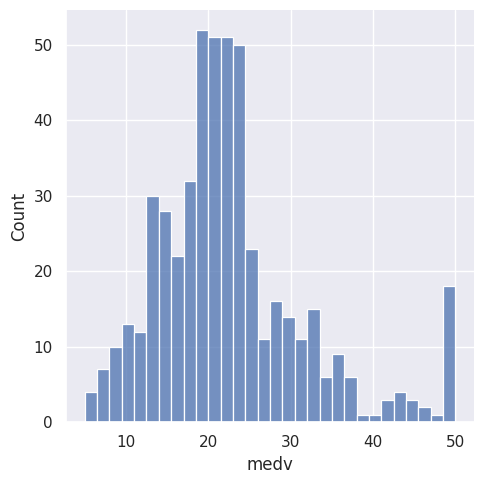

In [135]:
sns.displot(data["medv"], bins=30)
plt.show()

[]

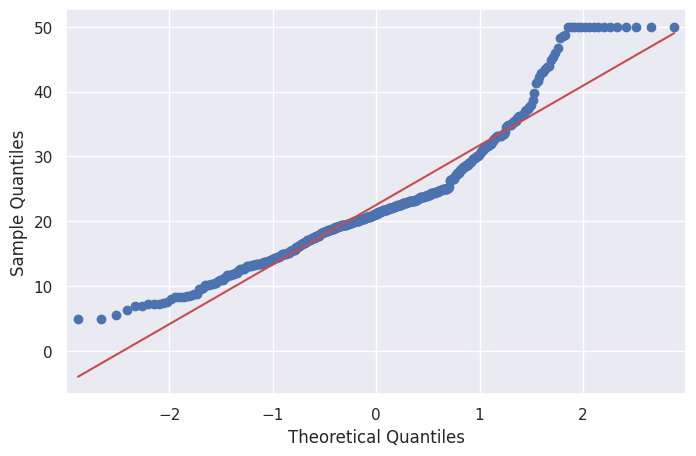

In [136]:
# Función QQPlot para evaluar si la variable "medv" proviene de una distribución Normal.
pr = sm.qqplot(data["medv"], line='s')

dt = pr.findobj(lambda x: hasattr(x, 'get_color') and x.get_color() == 'b')

[d.set_alpha(0.3) for d in dt]

La variable target pareciera ajustarse a una districión Normal con algunos datos atípicos hacia la cola derecha.

In [137]:
# Revisando la existencia de asimetría en las variables
print(data.skew())

crim       5.223149
zn         2.225666
indus      0.295022
nox        0.729308
rm         0.403612
age       -0.598963
dis        1.011781
rad        1.004815
tax        0.669956
ptratio   -0.802325
afro      -2.890374
lstat      0.906460
medv       1.108098
dtype: float64


In [138]:
# Revisando la concentración de la distribución de las variables mediante la kurtosis
print(data.kurt())

crim       37.130509
zn          4.031510
indus      -1.233540
nox        -0.064667
rm          1.891500
age        -0.967716
dis         0.487941
rad        -0.867232
tax        -1.142408
ptratio    -0.285091
afro        7.226818
lstat       0.493240
medv        1.495197
dtype: float64


Se observan que las variables "crim", "afro" y "zn" tienen menos concentración hacia la mediana; y por ende, sus curvas de distribuciòn son más achatadas en el centro, teniendo mayor presencia hacia las colas. Esto denota la presencia de datos atípicos.

Por otro lado, las variables "indus" y "rm" son casi simétricas.


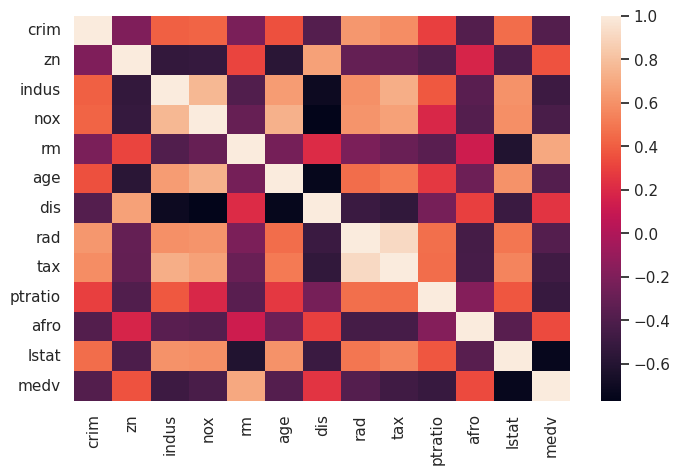

In [139]:
# Buscando correlaciones altas entre todas las variables
corr = data.corr()
sns.heatmap(corr)
plt.show()

A partir de la correlación de Pearson, se observan que las variables "lstat" y "rm" parecen tener una alta correlación con la variable target "medv", pero cada una en sentido opuesto.

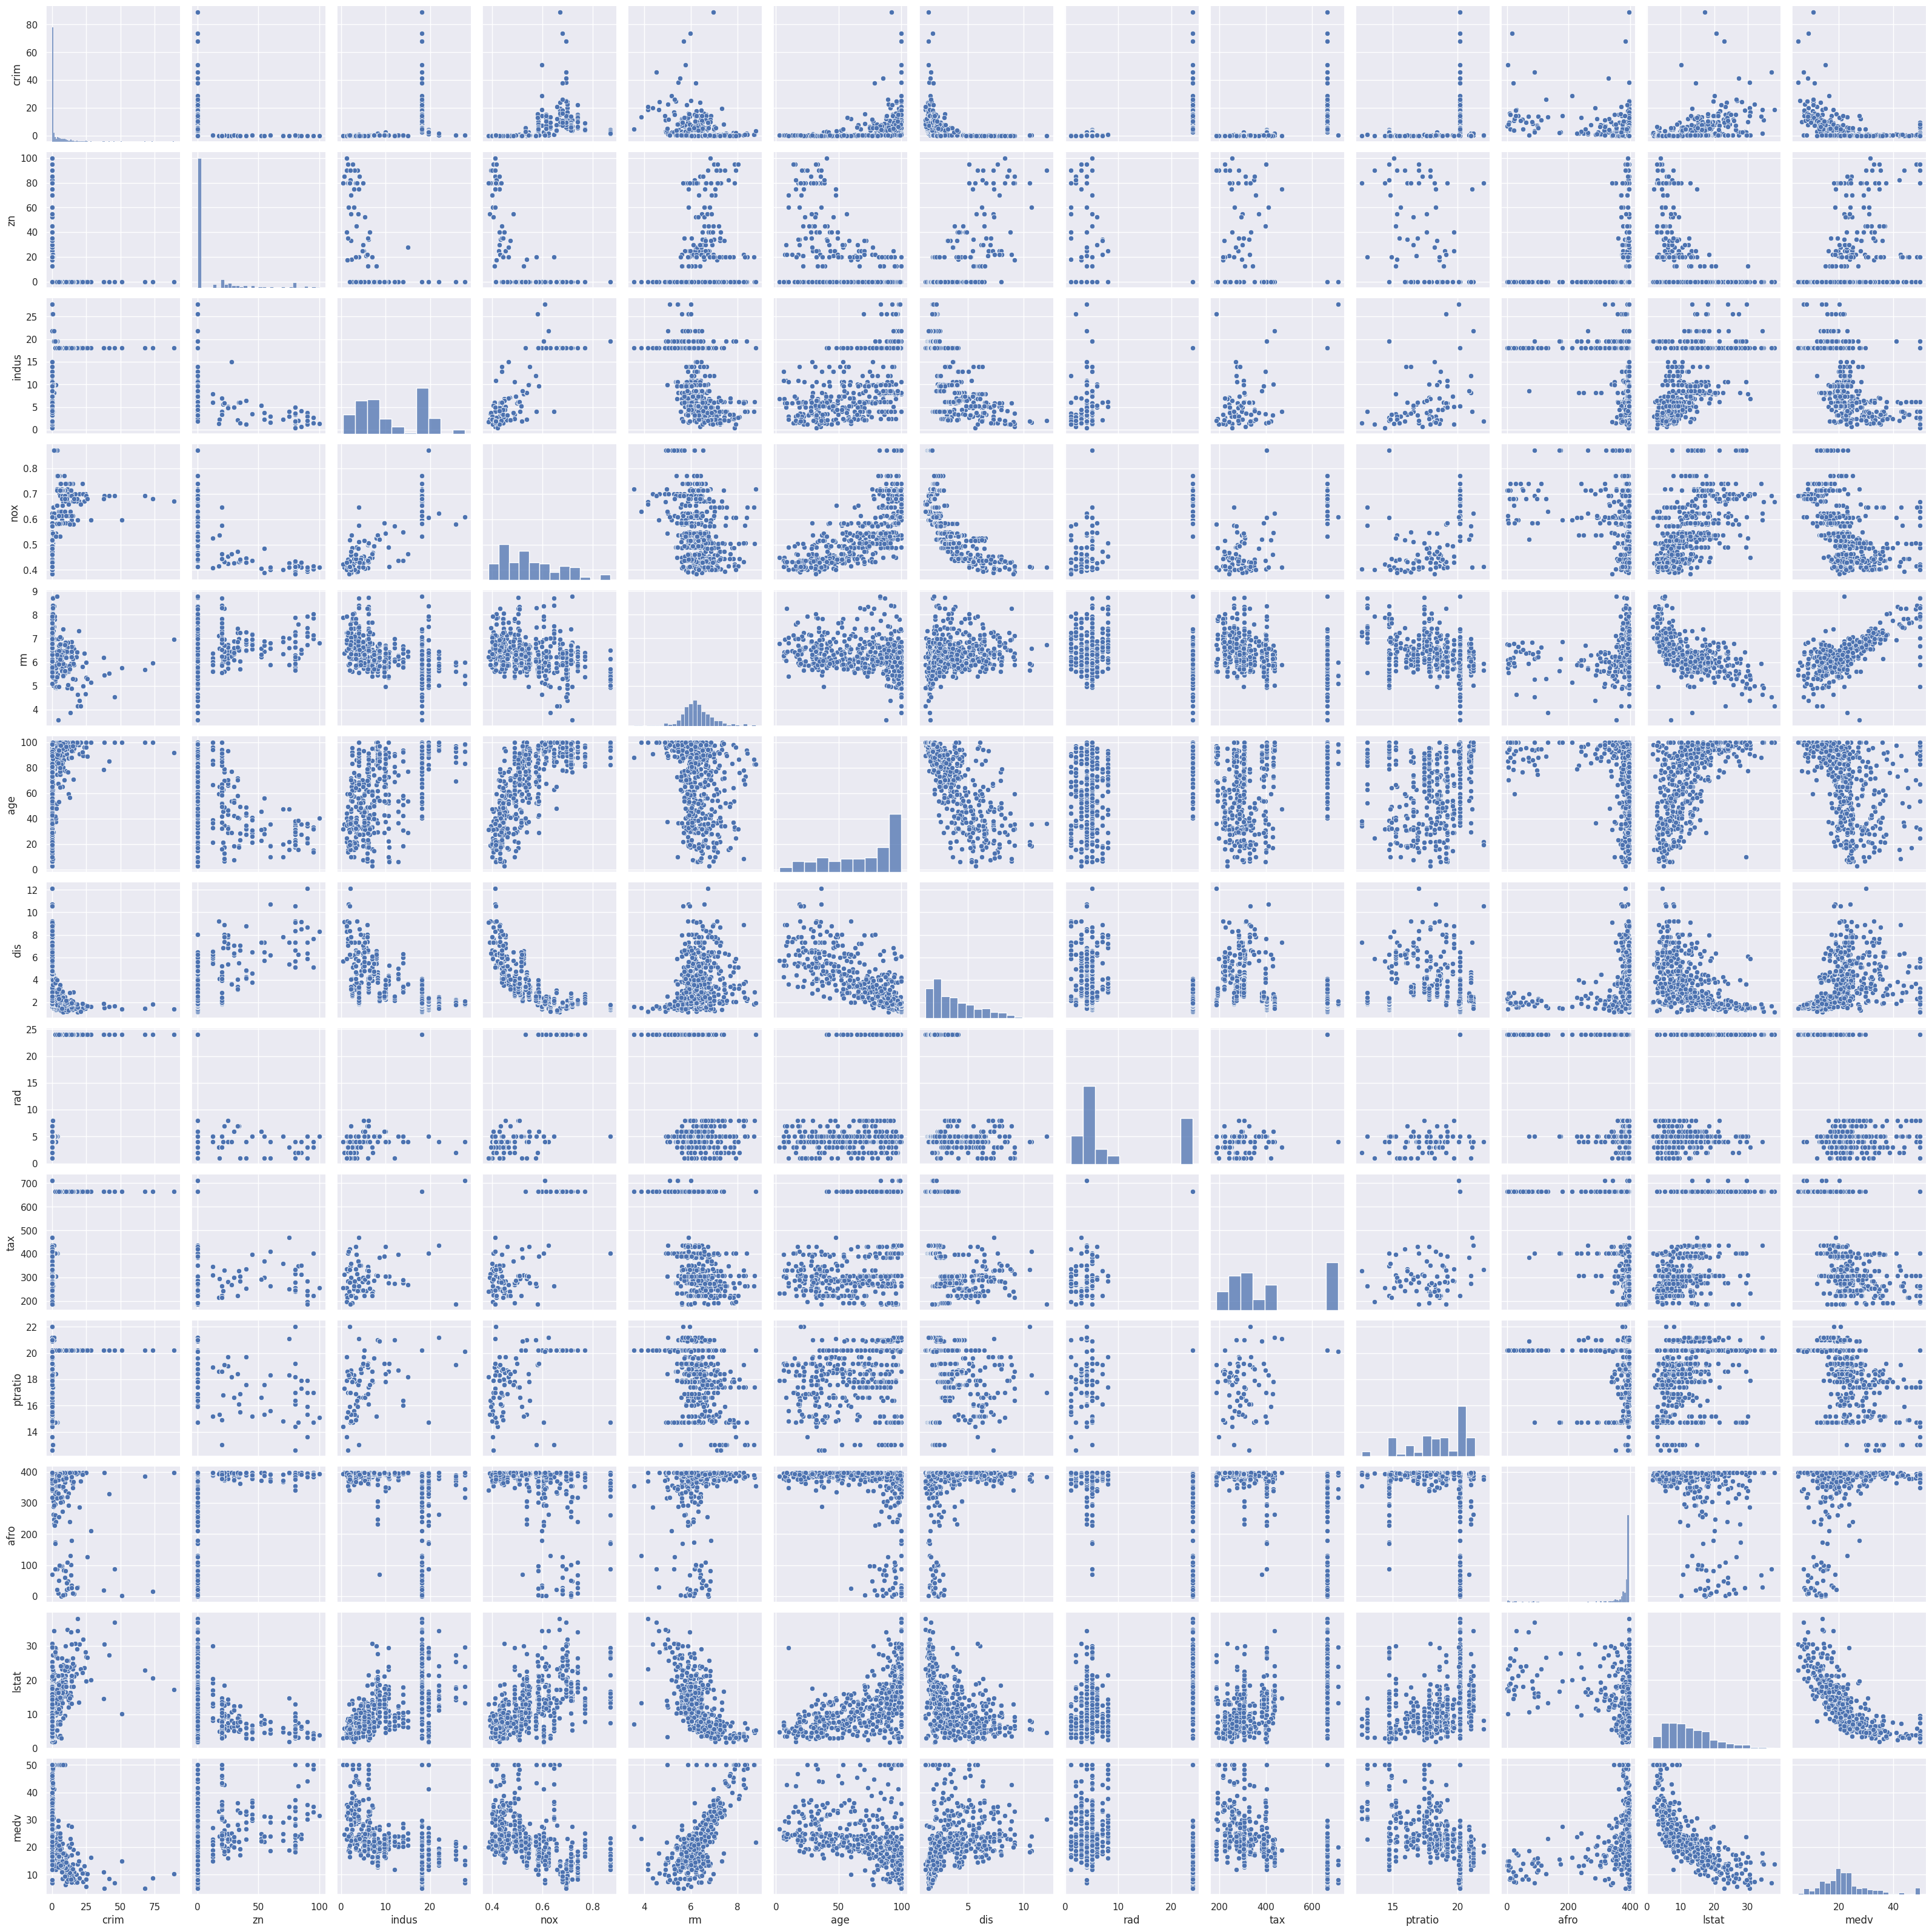

In [140]:
sns.pairplot(data)

## 5. Muestreo Train/Test

In [206]:
# Variables independientes
X = data.iloc[:, :12]

# Variable target
Y = data["medv"]

In [207]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=123)


In [208]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 12), (152, 12), (354,), (152,))

In [209]:
x_train.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,afro,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.515843,11.432203,10.889379,0.550042,6.314153,67.660734,3.853660,9.214689,401.550847,18.441525,360.450537,12.592599
std,9.203000,22.989767,6.839935,0.113865,0.708672,28.354127,2.127925,8.451106,166.332065,2.133292,87.909480,7.222552
min,0.013010,0.000000,0.460000,0.392000,3.561000,6.000000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.080573,0.000000,5.145000,0.448250,5.926500,42.325000,2.113700,4.000000,277.000000,17.400000,377.255000,6.877500
50%,0.223250,0.000000,8.560000,0.524000,6.214000,76.500000,3.294800,5.000000,329.000000,18.950000,392.215000,10.805000
75%,2.662860,19.375000,18.100000,0.624000,6.634000,92.975000,5.226975,8.000000,666.000000,20.200000,396.295000,17.117500
max,88.976200,100.000000,27.740000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [210]:
p1 = np.percentile(x_train['crim'],1)
p99 = np.percentile(x_train['crim'],99)
p1,p99

(0.0147186, 43.511142999999876)

In [211]:
x_train['crim']=np.clip(x_train['crim'],p1,p99)

In [213]:
x_train.describe(percentiles = [0.75, 0.80, 0.85, 0.90, 0.95, 0.99])

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,afro,lstat
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,3.227342,11.432203,10.889379,0.550042,6.314153,67.660734,3.853660,9.214689,401.550847,18.441525,360.450537,12.592599
std,7.166374,22.989767,6.839935,0.113865,0.708672,28.354127,2.127925,8.451106,166.332065,2.133292,87.909480,7.222552
min,0.014719,0.000000,0.460000,0.392000,3.561000,6.000000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
50%,0.223250,0.000000,8.560000,0.524000,6.214000,76.500000,3.294800,5.000000,329.000000,18.950000,392.215000,10.805000
75%,2.662860,19.375000,18.100000,0.624000,6.634000,92.975000,5.226975,8.000000,666.000000,20.200000,396.295000,17.117500
80%,4.785690,21.000000,18.100000,0.656600,6.796400,95.080000,5.525820,24.000000,666.000000,20.200000,396.900000,18.094000
85%,6.965172,25.150000,18.100000,0.693000,6.957550,96.220000,6.267055,24.000000,666.000000,20.200000,396.900000,19.785000
90%,9.571086,40.000000,19.580000,0.713000,7.171100,98.370000,6.817360,24.000000,666.000000,20.900000,396.900000,23.284000
95%,15.675310,80.000000,21.890000,0.740000,7.687750,100.000000,7.964000,24.000000,666.000000,21.000000,396.900000,27.302000


## 6. Modelamiento

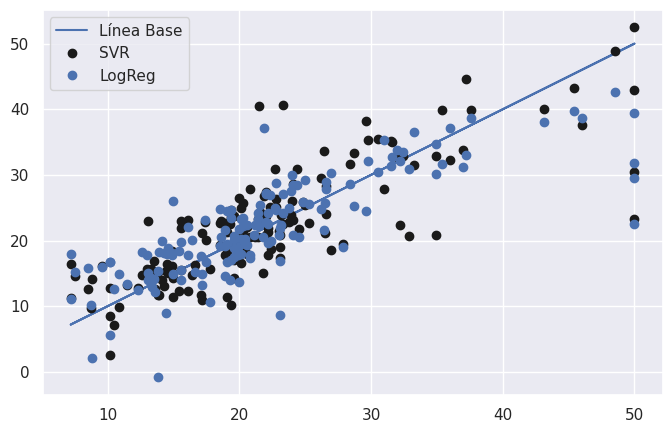

In [214]:
# Comparación de 2 méotodos: SVR (Support Vector Regression) y Regresión Lineal

svr = SVR(kernel='rbf',  C=100.0, epsilon=0.2, gamma=0.001)
log = LinearRegression()

# Entrenando ambos modelos
svr.fit(x_train, y_train)
log.fit(x_train, y_train)

# Resultados de predicción para ambos modelos
predLog = log.predict(x_test)
predSvr = svr.predict(x_test)

# Gráfica de resultados
plt.plot(y_test, y_test, label='Línea Base')
plt.plot(y_test, predSvr, 'ko', label='SVR')
plt.plot(y_test, predLog, 'bo', label='LogReg')
plt.legend()
plt.show()

In [215]:
confidence = svr.score(x_test, y_test)
print(confidence)

0.6275230918573405


In [216]:
confidence = log.score(x_test, y_test)
print(confidence)

0.646489426394095


El gráfico y el resultado de la precisión muestran que el mejor modelo para aplicar en este caso es la regresión lineal.

In [217]:
# Comparación del precio estimado por el modelo de regresión lineal vs. el precio real observado.

linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

precio_estimado = linear_model.predict(x_test)

predicción_dataframe = pd.DataFrame(
    {"Precio_Estimado": precio_estimado, "Precio_Observado": y_test})
print(predicción_dataframe)

     Precio_Estimado  Precio_Observado
410        14.968023              15.0
85         27.866293              26.6
280        39.726173              45.4
422        17.845383              20.8
199        30.173482              34.9
..               ...               ...
310        17.728549              16.1
91         27.075192              22.0
151        18.939086              19.6
426        16.794516              10.2
472        22.435014              23.2

[152 rows x 2 columns]


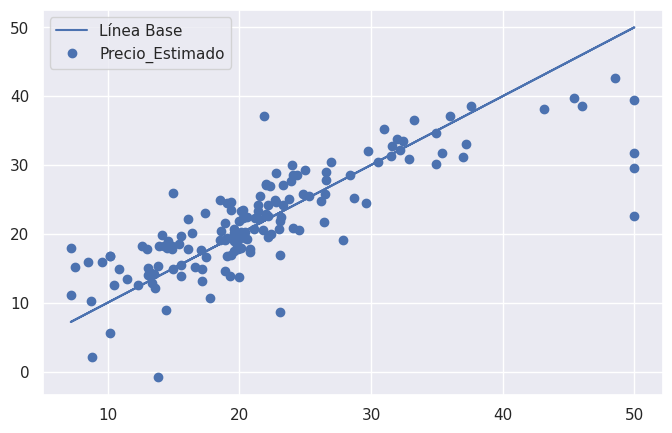

In [218]:
plt.plot(y_test, y_test, label='Línea Base')
plt.plot(y_test, precio_estimado, 'bo', label='Precio_Estimado')
plt.legend()
plt.show()

In [219]:
# Aplicación por Redes Neuronales
model = Sequential([Dense(64, kernel_initializer='normal', activation='relu', input_shape=(12,)),Dense(64, kernel_initializer='normal',activation='relu'), Dense(1, kernel_initializer='normal'),])

# Creación de modelo
model.compile(optimizer='rmsprop',loss='mse',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)

In [220]:
predicciones = model.predict(x_test)
predicciones

5/5 [==============================] - 0s 2ms/step


array([[14.605973 ],
       [25.549284 ],
       [40.38871  ],
       [12.481562 ],
       [24.517014 ],
       [36.739513 ],
       [28.296854 ],
       [ 9.20195  ],
       [16.49445  ],
       [24.205154 ],
       [23.266535 ],
       [21.19712  ],
       [11.755016 ],
       [25.888763 ],
       [18.59286  ],
       [19.161366 ],
       [19.718266 ],
       [34.80349  ],
       [18.521587 ],
       [11.6875725],
       [14.892172 ],
       [21.00138  ],
       [36.12235  ],
       [39.275112 ],
       [41.78043  ],
       [20.694328 ],
       [11.618565 ],
       [21.061188 ],
       [18.636623 ],
       [16.96737  ],
       [21.950787 ],
       [35.51851  ],
       [ 7.7669425],
       [19.08735  ],
       [20.381607 ],
       [29.018415 ],
       [23.406994 ],
       [13.047278 ],
       [14.413383 ],
       [41.15134  ],
       [24.816652 ],
       [17.377773 ],
       [16.853382 ],
       [48.03449  ],
       [17.735004 ],
       [21.839832 ],
       [20.16433  ],
       [21.94

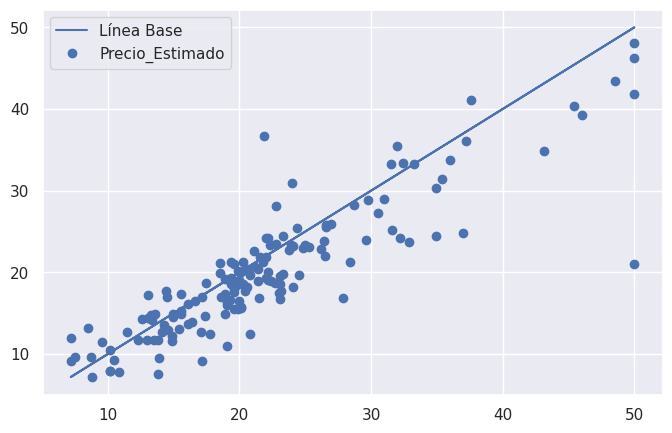

In [221]:
# Evaluación del modelo en test
plt.plot(y_test, y_test, label='Línea Base')
plt.plot(y_test, predicciones, 'bo', label='Precio_Estimado')
plt.legend()
plt.show()

In [222]:
# Métricas de validación del Error: (MSE y MAE) tanto para la regresión lineal como keras

# Modelo de regresión lineal
mse = mean_squared_error(precio_estimado, y_test) #la diferencia cuadrática media entre los valores predichos y lo que se predice.
mae = mean_absolute_error(precio_estimado, y_test) #¿Qué tan grande es el error que podemos esperar del pronóstico en promedio?
print(mse, mae)

28.573585050594104 3.6847917564374875


In [223]:
# Keras
mse = mean_squared_error(predicciones, y_test)
mae = mean_absolute_error(predicciones, y_test)
print(mse, mae)

20.693134405522507 3.0877598969559923
